# Importacion de librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import spacy
import gzip
import json
import gzip
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
!pip install googletrans==3.1.0a0 #Esta libreria me permite hacer la traduccion de idioma
from textblob import TextBlob #Esta me permite hacer el analisis de sentimiento
from tqdm import tqdm

# Importaciòn del archivo


In [ ]:
import pandas as pd

# URL desde Github
url = "https://raw.githubusercontent.com/Jairosandoval/3_deeplearning/main/Bangla%20Movie%20Comments%20-%20Dataset.csv"

try:
    opiniones_peliculas_bengali = pd.read_csv(url)
    print(opiniones_peliculas_bengali.head())  # Mostrar primeras filas
except Exception as e:
    print(f"An error occurred: {e}")


                                             Comment  Label       Movie Title  \
0  মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...    2.0  Chironjeeb Mujib   
1  কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...    2.0  Chironjeeb Mujib   
2  অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...    2.0  Chironjeeb Mujib   
3    গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।    2.0  Chironjeeb Mujib   
4  সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...    2.0  Chironjeeb Mujib   

   Genre Preference  Total Neutral  3000  Total Dislikes  3000.1  Total Likes  \
0  Drama    Dislike            NaN   NaN             NaN     NaN          NaN   
1  Drama    Dislike            NaN   NaN             NaN     NaN          NaN   
2  Drama    Dislike            NaN   NaN             NaN     NaN          NaN   
3  Drama    Dislike            NaN   NaN             NaN     NaN          NaN   
4  Drama    Dislike            NaN   NaN             NaN     NaN          NaN   

   3000.2  Dataset Size  9

# Exploracion previa del dataset


In [ ]:
opiniones_peliculas_bengali.head()

,Comment,Label,Movie Title,Genre,Preference,Total Neutral,3000,Total Dislikes,3000.1,Total Likes,3000.2,Dataset Size,9000
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",2.0,Chironjeeb Mujib,Drama,Dislike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",2.0,Chironjeeb Mujib,Drama,Dislike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",2.0,Chironjeeb Mujib,Drama,Dislike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",2.0,Chironjeeb Mujib,Drama,Dislike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",2.0,Chironjeeb Mujib,Drama,Dislike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#contabilizo total de valores en dataet
len(opiniones_peliculas_bengali)

#cuento total de valors nulos
null_counts = opiniones_peliculas_bengali.isnull().sum()
print(null_counts)


Comment              0
Label                1
Movie Title          1
Genre                1
Preference        3000
Total Neutral     9001
3000              9001
Total Dislikes    9001
3000.1            9001
Total Likes       9001
3000.2            9001
Dataset Size      9001
9000              9001
dtype: int64


In [ ]:
opiniones_peliculas_bengali.describe()

,Label,Total Neutral,3000,Total Dislikes,3000.1,Total Likes,3000.2,Dataset Size,9000
count,9000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.816542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Ahora voy a convertir los comentarios que existen en Bengali a español mediante algunas transformaciones.**


In [ ]:
#VISUALIZO COLUMNAS DISPONIBLES:

print(opiniones_peliculas_bengali.columns)

# Muestra aleatoria de 5 comentarios
print(opiniones_peliculas_bengali.sample(5))




Index(['Comment', 'Label', 'Movie Title', 'Genre', 'Preference',
       'Total Neutral', '3000', 'Total Dislikes', '3000.1', 'Total Likes',
       '3000.2', 'Dataset Size', '9000'],
      dtype='object')
                                                Comment  Label  \
3041  এই ছবির কাহিনী আমার হৃদয় স্পর্শ করেছে। দীর্ঘ দ...    1.0   
297   সিনেমা ভালো লেগেছে কিন্তু গল্পটা কিছু জায়গায় দ...    0.0   
8382  সিনেমার প্রথমার্ধ ভালো ছিল, তবে দ্বিতীয়ার্ধ কি...    2.0   
8385  সওয়া ছবিটি দেখার পরে মনে হলো, এটি একটি সাধারণ ...    2.0   
547   পুরো মুভিটি সত্যিই আকর্ষণীয় ছিল, আর সাকিব খানও...    1.0   

                    Movie Title     Genre Preference  Total Neutral  3000  \
3041  Kacher Manush Dure Thuiya  romantic       Like            NaN   NaN   
297                   Priyotoma  romantic    Dislike            NaN   NaN   
8382                     Swatta  Romantic        NaN            NaN   NaN   
8385                     Swatta  Romantic        NaN            NaN   NaN   
547           

,

In [ ]:
#Paso a usar las columnas que me interesan y visualizo el dataset

 #aca selecciono las columna q me importan
opiniones_peliculas_bengali = opiniones_peliculas_bengali[["Label", "Movie Title", "genero", "Preference", "Comment"]] # Changed 'Genre' to 'genero'


#Visualizo el dataset-
print(opiniones_peliculas_bengali.head)

<bound method NDFrame.head of       Label       Movie Title genero Preference  \
0       2.0  Chironjeeb Mujib  Drama    Dislike   
1       2.0  Chironjeeb Mujib  Drama    Dislike   
2       2.0  Chironjeeb Mujib  Drama    Dislike   
3       2.0  Chironjeeb Mujib  Drama    Dislike   
4       2.0  Chironjeeb Mujib  Drama    Dislike   
...     ...               ...    ...        ...   
8996    0.0          Bachelor  Drama        NaN   
8997    0.0          Bachelor  Drama        NaN   
8998    0.0          Bachelor  Drama        NaN   
8999    0.0          Bachelor  Drama        NaN   
9000    0.0          Bachelor  Drama        NaN   

                                                Comment  
0     মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...  
1     কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...  
2     অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...  
3       গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।  
4     সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...  
...      

In [ ]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(opiniones_peliculas_bengali.isnull().sum())


Valores nulos por columna:
Label             1
Movie Title       1
genero            1
Preference     3000
Comment           0
dtype: int64


In [ ]:
# Elimino las filas donde "coment" es nulo o vacío
opiniones_peliculas_bengali = opiniones_peliculas_bengali.dropna(subset=["Comment"])


# Muestro el número de filas después de la limpieza
print(f"\nNúmero de filas después de limpiar comentarios vacíos: {len(opiniones_peliculas_bengali)}")



Número de filas después de limpiar comentarios vacíos: 9001


# Traduccion de texto de columna Coment en Bengali a español


In [ ]:
# Inicializo el traductor con tqdm pandas
translator = Translator()
tqdm.pandas()  # Para barra de progreso que me muestre el avance


def traducir_batch(textos):
    try:
        return [translator.translate(t, src="bn", dest="es").text for t in textos]
    except Exception as e:
        print(f"Error en traducción: {e}")
        return textos  # Si falla, devuelveme el original

batch_size = 100  # Traducir en lotes de 100 comentarios, para mejor rendimiento y mas rapido
for i in tqdm(range(0, len(opiniones_peliculas_bengali), batch_size)):
    opiniones_peliculas_bengali.loc[i:i+batch_size-1, "coment_es"] = traducir_batch(
        opiniones_peliculas_bengali["Comment"][i:i+batch_size]
    )


100%|██████████| 91/91 [2:25:51<00:00, 96.17s/it]


In [ ]:
opiniones_peliculas_bengali.head()


,Label,Movie Title,genero,Preference,Comment,coment_es
0,2.0,Chironjeeb Mujib,Drama,Dislike,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...","Como ver el trailer de la película, pero en al..."
1,2.0,Chironjeeb Mujib,Drama,Dislike,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...","Algunas escenas fueron muy buenas, pero sentí ..."
2,2.0,Chironjeeb Mujib,Drama,Dislike,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...","Actuar es bastante buena, pero la producción p..."
3,2.0,Chironjeeb Mujib,Drama,Dislike,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।","La historia está bien, pero en algunos lugares..."
4,2.0,Chironjeeb Mujib,Drama,Dislike,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...","Al igual que las canciones y las escenas, pero..."


In [ ]:
# Mapear valores numéricos de Label a categorías de sentimiento
sentiment_mapping = {0: "Negativo", 1: "Neutral", 2: "Positivo"}
opiniones_peliculas_bengali["Label"] = opiniones_peliculas_bengali["Label"].map(sentiment_mapping)

# Verificar que se haya convertido correctamente
print(opiniones_peliculas_bengali["Label"].value_counts())


Label
Positivo    3000
Neutral     3000
Negativo    3000
Name: count, dtype: int64


In [ ]:
from textblob import TextBlob

# Función para analizar sentimiento
def analizar_sentimiento(texto):
    if isinstance(texto, str):  # Verifica que el texto no sea NaN
        analisis = TextBlob(texto)
        polaridad = analisis.sentiment.polarity  # Rango de -1 a 1
        sentimiento = "Positivo" if polaridad > 0 else "Negativo" if polaridad < 0 else "Neutral"
        return sentimiento, polaridad
    else:
        return "Neutral", 0  # Si el texto está vacío, lo consideramos neutral

# Aplicar análisis de sentimiento
opiniones_peliculas_bengali[["Sentimiento_TextBlob", "Polaridad"]] = opiniones_peliculas_bengali["coment_es"].apply(lambda x: pd.Series(analizar_sentimiento(x)))

# Ver algunos ejemplos
print(opiniones_peliculas_bengali[["Label", "Sentimiento_TextBlob", "Polaridad", "coment_es"]].sample(10))


         Label Sentimiento_TextBlob  Polaridad  \
1769   Neutral              Neutral        0.0   
5085  Negativo              Neutral        0.0   
4347   Neutral              Neutral        0.0   
3143  Negativo              Neutral        0.0   
1068   Neutral              Neutral        0.0   
8993   Neutral              Neutral        0.0   
8462  Positivo              Neutral        0.0   
4938  Negativo              Neutral        0.0   
8485  Positivo              Neutral        0.0   
5758  Negativo              Neutral        0.0   

                                              coment_es  
1769  Realmente puede ser una película importante en...  
5085    El guión no estaba bien, perdí algo de interés.  
4347  La conexión de múltiples historias en la pelíc...  
3143  La química era un poco menos entre los persona...  
1068  En esta película obtuve algo nuevo, como la pr...  
8993    ¡El personaje de API Karim era realmente lindo!  
8462          Como ver la última escena de 

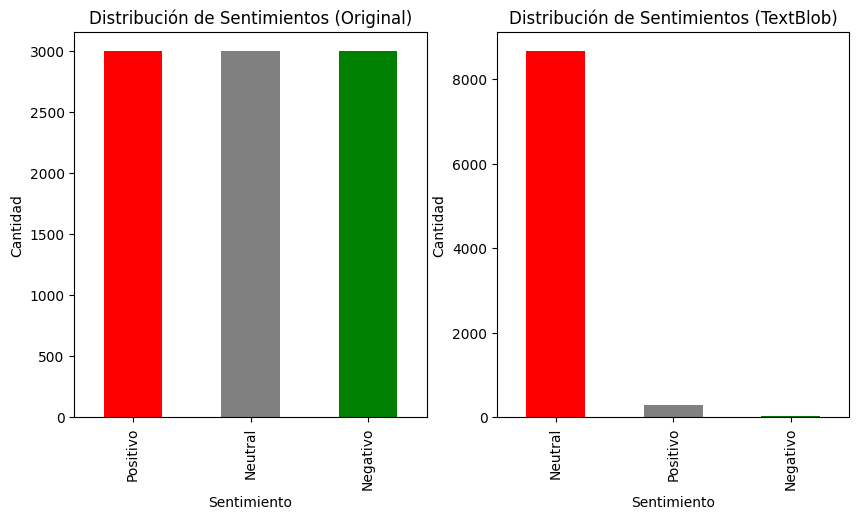

In [ ]:
import matplotlib.pyplot as plt

# Contar las ocurrencias de cada sentimiento en `Label` y `Sentimiento_TextBlob`
conteo_label = opiniones_peliculas_bengali["Label"].value_counts()
conteo_textblob = opiniones_peliculas_bengali["Sentimiento_TextBlob"].value_counts()

# Graficar
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
conteo_label.plot(kind="bar", color=["red", "gray", "green"])
plt.title("Distribución de Sentimientos (Original)")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")

plt.subplot(1, 2, 2)
conteo_textblob.plot(kind="bar", color=["red", "gray", "green"])
plt.title("Distribución de Sentimientos (TextBlob)")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")

plt.show()


In [ ]:
# Ver la cantidad de cada sentimiento según TextBlob
conteo_textblob = opiniones_peliculas_bengali["Sentimiento_TextBlob"].value_counts()

# Mostrar distribución
print("\n📊 Distribución de Sentimientos según TextBlob:")
print(conteo_textblob)



📊 Distribución de Sentimientos según TextBlob:
Sentimiento_TextBlob
Neutral     8675
Positivo     287
Negativo      39
Name: count, dtype: int64


Ya que esta muy bien balanceado, no veo viable seguir con este proyecto para poder encontrar sesgos reales o que no represente la realidad de los comentarios en linea.
